In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mkl_random import logistic

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
y = data.Outcome
X = data.drop(['Outcome'], axis=1)

In [6]:
y.shape, X.shape

((768,), (768, 8))

In [7]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X, y)

LogisticRegression(max_iter=1000)

In [8]:
print(f"Coefficients: {logistic_model.coef_[0]}")

Coefficients: [ 1.22505160e-01  3.51099563e-02 -1.32987359e-02  7.78690277e-04
 -1.17362787e-03  8.96527929e-02  8.67790286e-01  1.49830228e-02]


In [9]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [10]:
_ = [print(k, v) for k, v in zip(X.columns, logistic_model.coef_[0])]

Pregnancies 0.12250515989925868
Glucose 0.03510995630887341
BloodPressure -0.013298735878331327
SkinThickness 0.0007786902767586193
Insulin -0.00117362786829671
BMI 0.08965279293917926
DiabetesPedigreeFunction 0.8677902863707057
Age 0.014983022846181396


In [11]:
print(f"Intercept: {logistic_model.intercept_}")

Intercept: [-8.36507758]


In [12]:
y_pred = logistic_model.predict(X)

In [13]:
_ = [print(k, v) for k, v in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [14]:
from sklearn import metrics

In [15]:
metrics.confusion_matrix(y, y_pred)

array([[444,  56],
       [112, 156]], dtype=int64)

<Axes: >

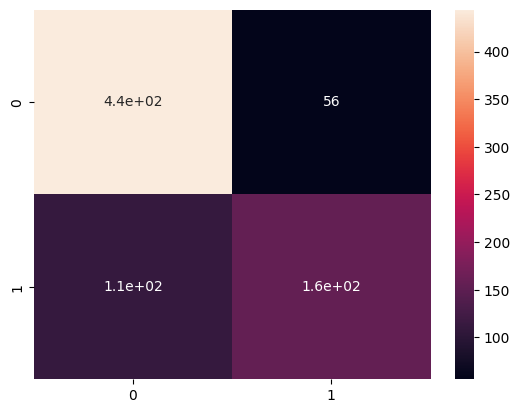

In [17]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [18]:
logistic_model.score(X, y)

0.78125

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)


In [44]:
polynomial = LogisticRegression()
polynomial.fit(X_poly, y)
y_pred_poly = polynomial.predict(poly)

c:\Users\Lev\Desktop\ml\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Expected 2D array, got scalar array instead:
array=PolynomialFeatures().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
polynomial.score(X_poly, y)

0.7903645833333334